# 🏘️ Анализ цен на недвижимость в Мельбурне

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# Загрузка данных
train_data = pd.read_csv('./DATA/train.csv')
test_data = pd.read_csv('./DATA/test.csv')

## EDA
Dataset Description Это данные о ценах на недвижимость в Мельбурне. Каждая строчка – это объект недвижимости, по которому известны некоторые параметры и его цена. Задача заключается в том, чтобы по этим параметрам определить цену объекта.

In [190]:
train_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [172]:
test_data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,...,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,...,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,...,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,...,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339


In [174]:
# Сохраним ID для submission
test_ids = test_data['id']

In [176]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Date           18373 non-null  object 
 8   Distance       18373 non-null  float64
 9   Postcode       18373 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Longti

In [178]:
train_data['Date']

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
18368    30/09/2017
18369    30/09/2017
18370    30/09/2017
18371    30/09/2017
18372    30/09/2017
Name: Date, Length: 18373, dtype: object

In [180]:
#переведим столбец Date в формат дата
train_data['Date'] = train_data['Date'].str.replace('/','-')
test_data['Date'] = test_data['Date'].str.replace('/','-')
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%d-%m-%Y')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d-%m-%Y')

In [182]:
train_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4794
BuildingArea     10623
YearBuilt         9429
CouncilArea          1
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
id                   0
dtype: int64

In [184]:
train_data.describe().round(2)

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,id
count,18373.00,18373.00,18373,18373.00,18373.00,14905.00,14903.00,14798.00,13579.00,7750.00,8944.00,15041.00,15041.00,18372.00,18373.00
mean,2.94,1053234.88,2017-02-11 15:15:39.922712576,10.40,3107.26,2.91,1.54,1.62,558.94,151.13,1965.93,-37.81,145.00,7518.62,17490.73
min,1.00,227000.00,2016-01-28 00:00:00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00,2.00
25%,2.00,635000.00,2016-09-17 00:00:00,6.30,3046.00,2.00,1.00,1.00,177.00,93.00,1950.00,-37.86,144.93,4294.00,8749.00
50%,3.00,880000.00,2017-03-18 00:00:00,9.70,3085.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6567.00,17497.00
75%,3.00,1301000.00,2017-07-08 00:00:00,13.30,3149.00,3.00,2.00,2.00,651.00,173.86,2000.00,-37.76,145.06,10331.00,26286.00
max,12.00,5580000.00,2017-09-30 00:00:00,48.10,3978.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00,34856.00
std,0.96,621797.25,NaN,6.02,95.29,0.96,0.69,0.96,3991.52,519.52,36.96,0.08,0.11,4487.14,10075.86


## Анализ целевой переменной (Price)

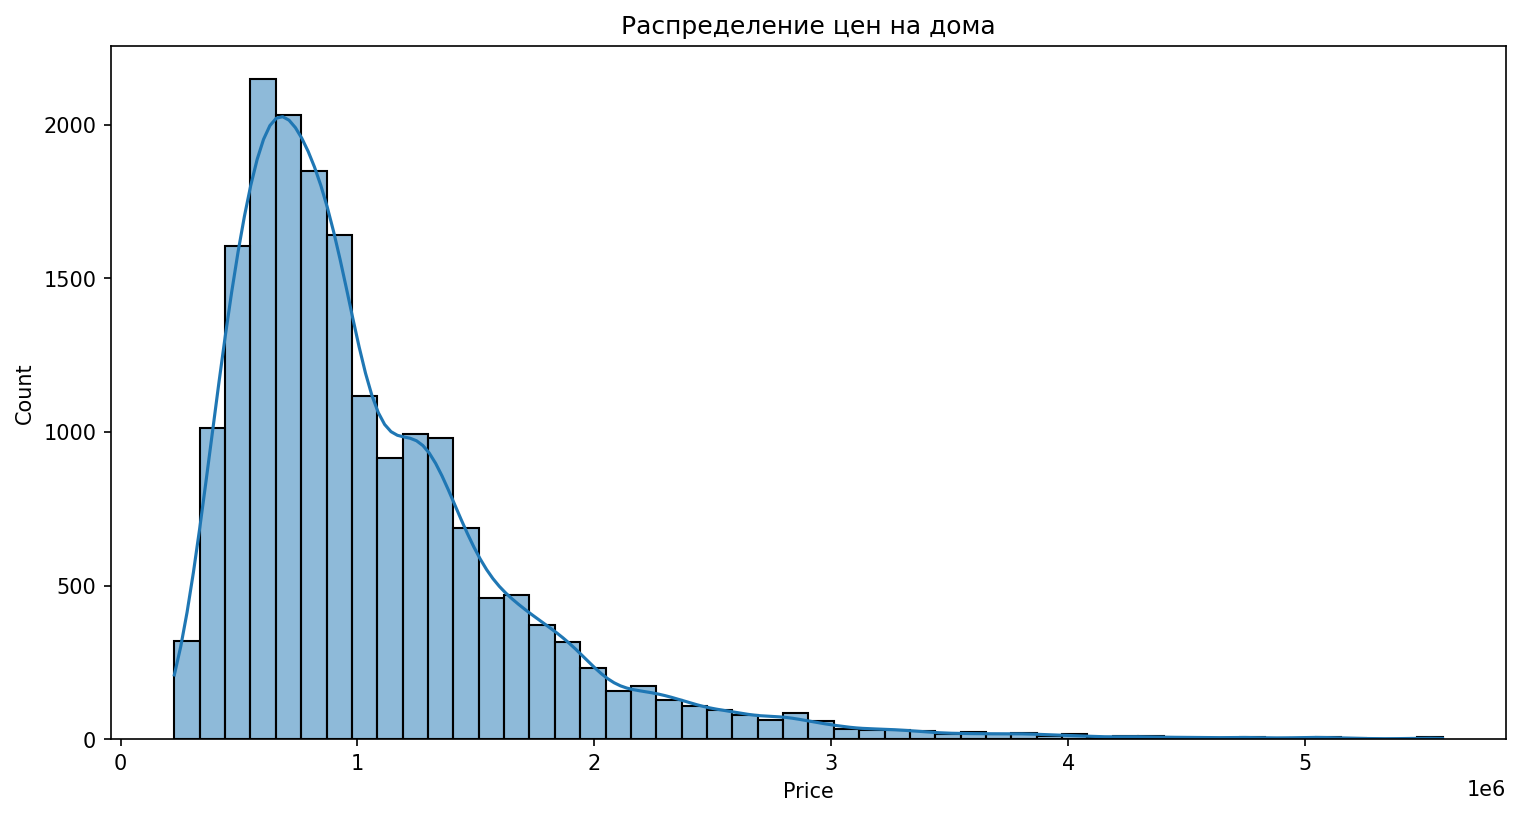

In [187]:
plt.figure(figsize=(12, 6),dpi=150)
sns.histplot(train_data['Price'], kde=True, bins=50)
plt.title('Распределение цен на дома');

Исходные данные имеют значительный разброс и асимметрию, что типично для финансовых показателей, таких как цены на жильё.

## Анализ корреляций

In [192]:
train_data.corr(numeric_only = True)['Price']

Rooms            0.499639
Price            1.000000
Distance        -0.172521
Postcode         0.097487
Bedroom2         0.477260
Bathroom         0.463648
Car              0.238572
Landsize         0.037681
BuildingArea     0.094909
YearBuilt       -0.326959
Lattitude       -0.206103
Longtitude       0.198808
Propertycount   -0.053093
id              -0.004071
Name: Price, dtype: float64

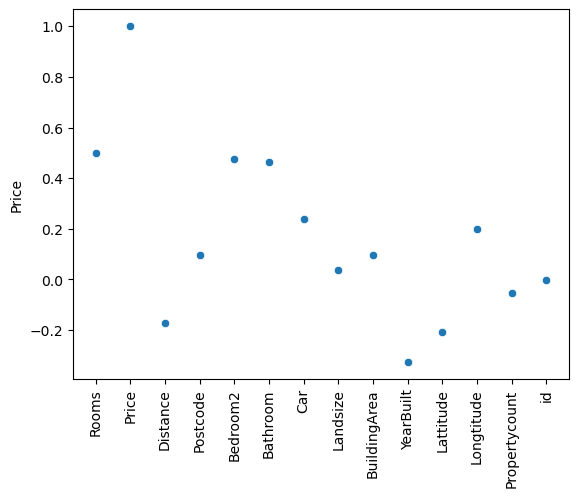

In [194]:
sns.scatterplot(train_data.corr(numeric_only = True)['Price'])
plt.xticks(rotation = 90);

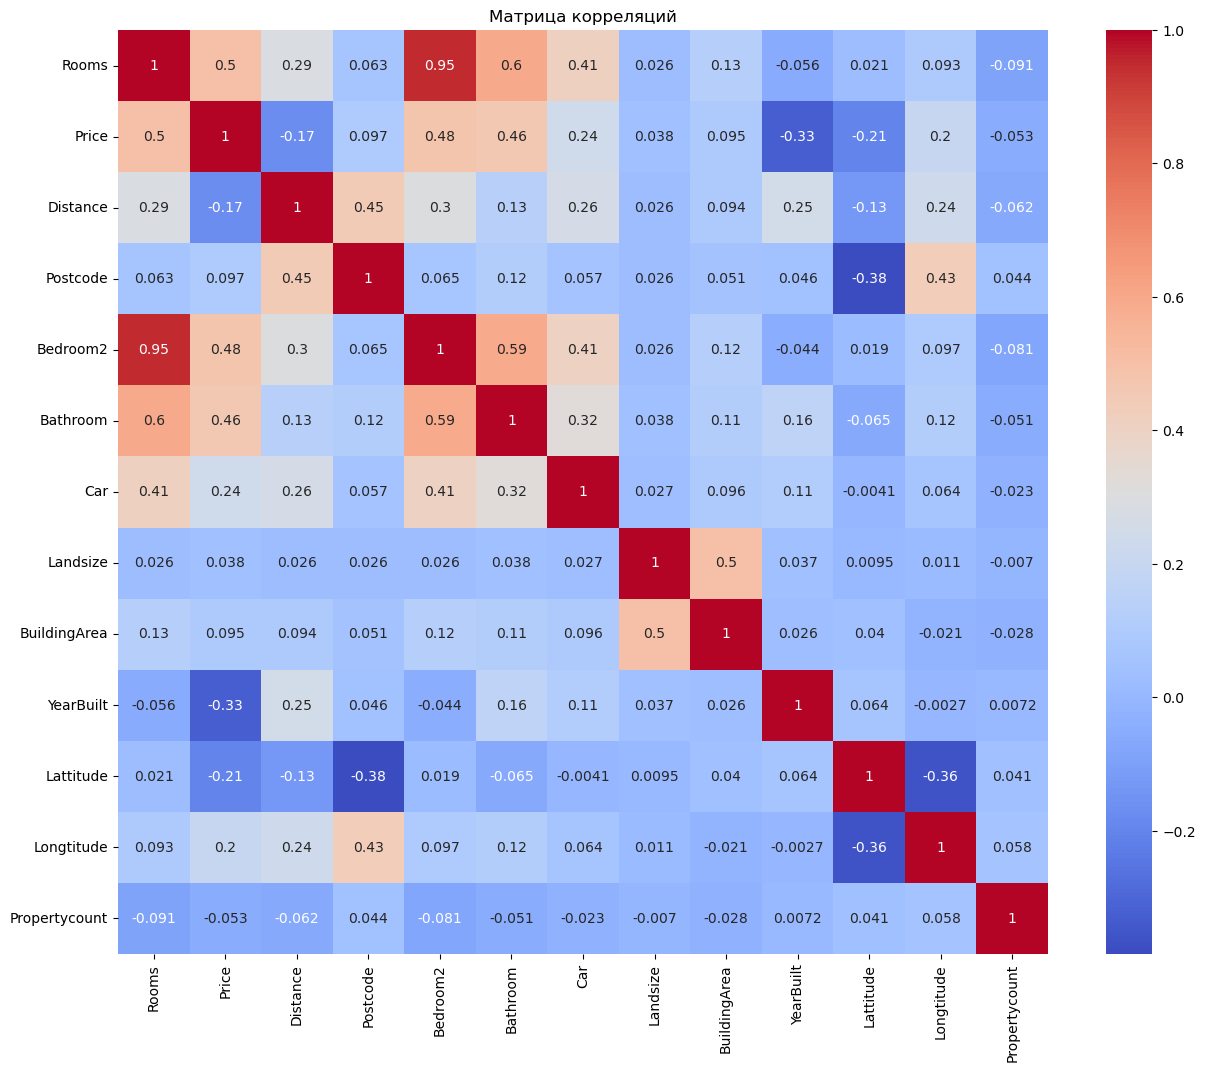

In [196]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.drop('id',axis=1).corr(numeric_only = True), cmap='coolwarm', annot=True)
plt.title('Матрица корреляций');

На основании матрицы корреляций можно сделать следующие выводы:

Сильные корреляции (r > 0.5)

    Rooms и Bedroom2 (0.95) — почти линейная зависимость.
    Это ожидаемо, так как количество комнат и спален обычно тесно связаны.
            
    Rooms и Price (0.56) — умеренная положительная связь: больше комнат → выше цена.
             
    Bedroom2 и Price (0.53) — аналогично, больше спален → дороже дом.

    Bathroom и Price (0.45) — наличие ванных комнат тоже влияет на цену.
            
    Postcode и Distance (0.45) — возможно, почтовые индексы отражают удаленность от центра.
            
    Latitude и Longitude (-0.36) — отрицательная корреляция, что типично для
    географических координат(например, чем севернее,  тем западнее).
Слабые корреляции (0.1 < r < 0.5)

    Car и Price (0.26) — парковочные места немного увеличивают стоимость.
            
    YearBuilt и Price (-0.36) — старые дома могут быть дешевле (отрицательная связь).
    
Итог: На цену сильнее всего влияют количество комнат/спален и локация, тогда как параметры участка и площади почти не важны.

In [198]:
# Топ-10 признаков по корреляции с Price
top_corr = train_data.drop('id',axis=1).corr(numeric_only = True)['Price'].sort_values(ascending=False).head(11)
print("Топ-10 признаков по корреляции с ценой:")
print(top_corr[1:])  # исключаем сам Price

Топ-10 признаков по корреляции с ценой:
Rooms            0.499639
Bedroom2         0.477260
Bathroom         0.463648
Car              0.238572
Longtitude       0.198808
Postcode         0.097487
BuildingArea     0.094909
Landsize         0.037681
Propertycount   -0.053093
Distance        -0.172521
Name: Price, dtype: float64


## Анализ пропущенных значений

In [202]:
#функцию для подсчета поцента пропущенных значений для каждой колонки
def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result

In [204]:
percent_nan = percent_missing(train_data)

In [206]:
percent_nan

CouncilArea       0.005443
Regionname        0.005443
Propertycount     0.005443
Lattitude        18.135307
Longtitude       18.135307
Bedroom2         18.875524
Bathroom         18.886409
Car              19.457900
Landsize         26.092636
YearBuilt        51.319872
BuildingArea     57.818538
dtype: float64

C:\Users\kushh\AppData\Local\Temp\ipykernel_12328\3078779967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan.index,y=percent_nan, palette="viridis")


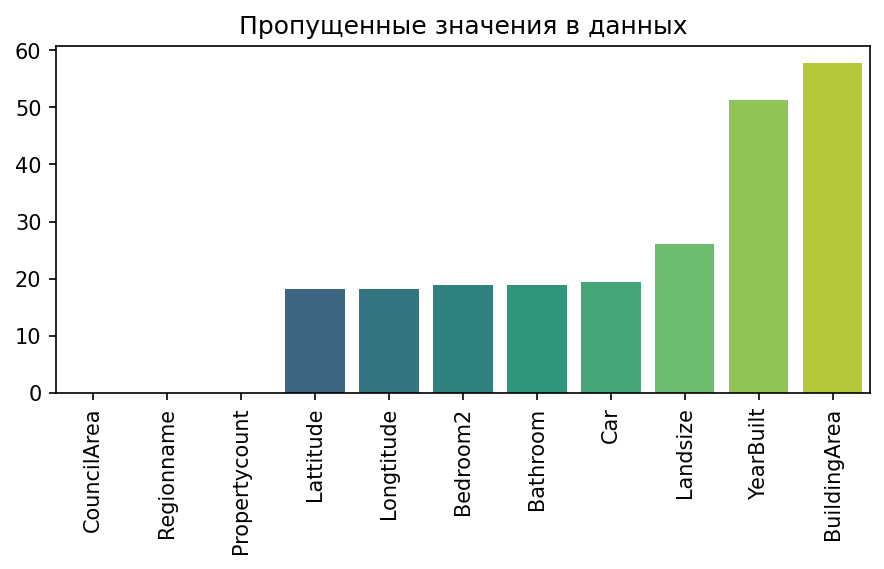

In [208]:
plt.figure(figsize=(7,3),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan, palette="viridis")
plt.xlabel('')  # Убирает название оси X
plt.ylabel('')  # Убирает название оси Y
plt.xticks(rotation = 90)
plt.title('Пропущенные значения в данных');

In [209]:
percent_nan_test = percent_missing(test_data)

C:\Users\kushh\AppData\Local\Temp\ipykernel_12328\1409390946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percent_nan_test.index,y=percent_nan_test, palette="viridis")


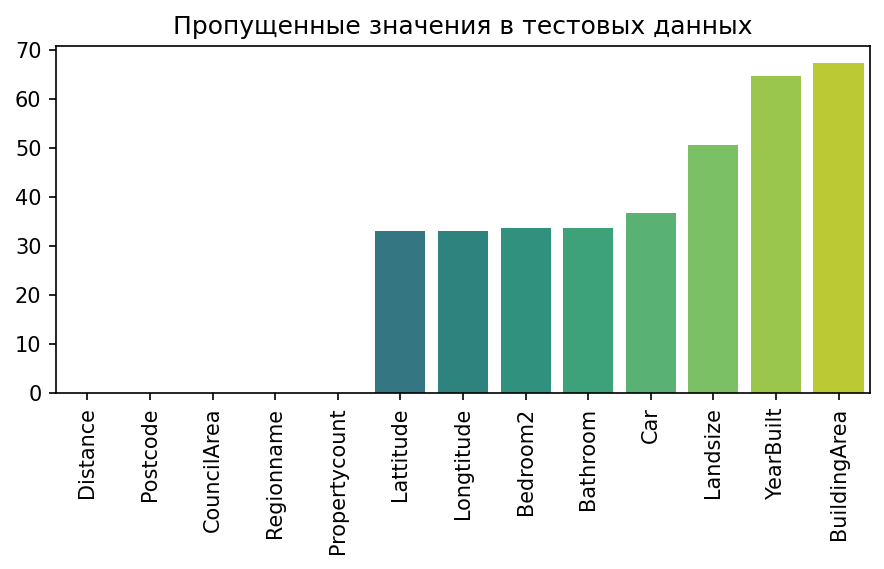

In [210]:
plt.figure(figsize=(7,3),dpi=150)
sns.barplot(x=percent_nan_test.index,y=percent_nan_test, palette="viridis")
plt.xlabel('')  # Убирает название оси X
plt.ylabel('')  # Убирает название оси Y
plt.xticks(rotation = 90)
plt.title('Пропущенные значения в тестовых данных');

В столбце BuildingArea и YearBuilt больше 50% пропущенных значений, попробуем поискать признаки с которыми они коррелируют больше всего и заполним пропущенные значения на их основе 

In [214]:
train_data.corr(numeric_only=True)['BuildingArea'].sort_values(ascending=False)

BuildingArea     1.000000
Landsize         0.500572
Rooms            0.126645
Bedroom2         0.124850
Bathroom         0.114884
Car              0.096393
Price            0.094909
Distance         0.094182
Postcode         0.051450
Lattitude        0.040215
YearBuilt        0.026426
id              -0.003004
Longtitude      -0.021007
Propertycount   -0.027900
Name: BuildingArea, dtype: float64

In [215]:
#заполним пропуски BuildingArea по типу дома и площади прилегающей территории
#сначала заполняем пропуски Landsize
# train
avg_by_suburb = train_data.groupby('Suburb')['Landsize'].mean()
train_data['Landsize'] = train_data['Landsize'].fillna(train_data['Suburb'].map(avg_by_suburb))
# Если остались пропуски - заполняем общей медианой
train_data['Landsize'] = train_data['Landsize'].fillna(train_data['Landsize'].median())
# test
avg_by_suburb_test = test_data.groupby('Suburb')['Landsize'].mean()
test_data['Landsize'] = test_data['Landsize'].fillna(test_data['Suburb'].map(avg_by_suburb_test))
test_data['Landsize'] = test_data['Landsize'].fillna(test_data['Landsize'].median())

In [217]:
percent_missing(train_data)

CouncilArea       0.005443
Regionname        0.005443
Propertycount     0.005443
Lattitude        18.135307
Longtitude       18.135307
Bedroom2         18.875524
Bathroom         18.886409
Car              19.457900
YearBuilt        51.319872
BuildingArea     57.818538
dtype: float64

In [221]:
# train
train_data["BuildingArea"] = train_data.groupby(["Type","Landsize"])["BuildingArea"].transform(
    lambda x: x.fillna(train_data.groupby(["Type","Landsize"])["BuildingArea"].median()[x.name])
)
train_data['BuildingArea'] = train_data['BuildingArea'].fillna(train_data['BuildingArea'].median())

# test
test_data["BuildingArea"] = test_data.groupby(["Type","Landsize"])["BuildingArea"].transform(
    lambda x: x.fillna(test_data.groupby(["Type","Landsize"])["BuildingArea"].median()[x.name])
)
test_data['BuildingArea'] = test_data['BuildingArea'].fillna(test_data['BuildingArea'].median())

In [222]:
percent_missing(train_data)

CouncilArea       0.005443
Regionname        0.005443
Propertycount     0.005443
Lattitude        18.135307
Longtitude       18.135307
Bedroom2         18.875524
Bathroom         18.886409
Car              19.457900
YearBuilt        51.319872
dtype: float64

In [223]:
train_data["YearBuilt"].describe()

count    8944.000000
mean     1965.925089
std        36.958956
min      1196.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: YearBuilt, dtype: float64

In [224]:
test_data["YearBuilt"].describe()

count    3112.000000
mean     1968.751928
std        35.968997
min      1820.000000
25%      1950.000000
50%      1975.000000
75%      2000.000000
max      2019.000000
Name: YearBuilt, dtype: float64

минимальный год 1196 выглядит подозрительно, скорее всего ошибка

In [226]:
train_data[train_data["YearBuilt"]==1196]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
12721,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,11846


In [227]:
train_data["YearBuilt"] = train_data["YearBuilt"].replace(1196, np.nan)

## Заполним пропуски в YearBuilt средним значением по соответствующему району

In [229]:
train_data["YearBuilt"] = train_data.groupby(["Suburb"])["YearBuilt"].transform(
    lambda x: x.fillna(train_data.groupby(["Suburb"])["YearBuilt"].mean()[x.name])
)
train_data["YearBuilt"] = train_data["YearBuilt"].fillna(train_data["YearBuilt"].mean()).astype(int)


test_data["YearBuilt"] = test_data.groupby(["Suburb"])["YearBuilt"].transform(
    lambda x: x.fillna(test_data.groupby(["Suburb"])["YearBuilt"].mean()[x.name])
)
test_data["YearBuilt"] = test_data["YearBuilt"].fillna(test_data["YearBuilt"].mean()).astype(int)

In [230]:
percent_missing(train_data)

CouncilArea       0.005443
Regionname        0.005443
Propertycount     0.005443
Lattitude        18.135307
Longtitude       18.135307
Bedroom2         18.875524
Bathroom         18.886409
Car              19.457900
dtype: float64

**Географические координаты (Lattitude, Longtitude)**

In [232]:
train_data.corr(numeric_only=True)['Lattitude'].sort_values(ascending=False)

Lattitude        1.000000
YearBuilt        0.069380
BuildingArea     0.044319
Propertycount    0.040666
Rooms            0.021266
Bedroom2         0.019054
Landsize         0.015473
id              -0.000343
Car             -0.004129
Bathroom        -0.064928
Distance        -0.134965
Price           -0.206103
Longtitude      -0.360960
Postcode        -0.384734
Name: Lattitude, dtype: float64

In [233]:
train_data.corr(numeric_only=True)['Longtitude'].sort_values(ascending=False)

Longtitude       1.000000
Postcode         0.433615
Distance         0.235059
Price            0.198808
Bathroom         0.118039
Bedroom2         0.096736
Rooms            0.092957
Car              0.063781
Propertycount    0.058360
Landsize         0.005554
YearBuilt        0.004078
id              -0.011798
BuildingArea    -0.023107
Lattitude       -0.360960
Name: Longtitude, dtype: float64

Географические координаты я просто дропну

**Car, Bedroom2 and Bathroom**

In [236]:
train_data.corr(numeric_only=True)['Car'].sort_values(ascending=False)

Car              1.000000
Rooms            0.412486
Bedroom2         0.409478
Bathroom         0.324802
Distance         0.261796
Price            0.238572
YearBuilt        0.135302
BuildingArea     0.079196
Longtitude       0.063781
Postcode         0.057261
Landsize         0.026097
id               0.015916
Lattitude       -0.004129
Propertycount   -0.023414
Name: Car, dtype: float64

In [237]:
# Заполняем по медиане для групп Rooms + Type
median_car_by_rooms_type = train_data.groupby(['Rooms', 'Type'])['Car'].median()
train_data['Car'] = train_data.apply(
    lambda x: median_car_by_rooms_type.get((x['Rooms'], x['Type']), x['Car']),
    axis=1
)
train_data['Car'] = train_data['Car'].fillna(1)


median_car_by_rooms_type_test = test_data.groupby(['Rooms', 'Type'])['Car'].median()
test_data['Car'] = test_data.apply(
    lambda x: median_car_by_rooms_type_test.get((x['Rooms'], x['Type']), x['Car']),
    axis=1
)
test_data['Car'] = test_data['Car'].fillna(1)

In [238]:
train_data.corr(numeric_only=True)['Bedroom2'].sort_values(ascending=False)

Bedroom2         1.000000
Rooms            0.948558
Car              0.736650
Bathroom         0.589781
Price            0.477260
Distance         0.297242
BuildingArea     0.104066
Longtitude       0.096736
Postcode         0.065251
Landsize         0.026186
Lattitude        0.019054
YearBuilt        0.013968
id               0.003916
Propertycount   -0.081073
Name: Bedroom2, dtype: float64

Заполним на основе Rooms (часто Bedroom2 ≈ Rooms - 1)

In [240]:
train_data['Bedroom2'] = train_data['Bedroom2'].fillna(train_data['Rooms'] - 1)

test_data['Bedroom2'] = test_data['Bedroom2'].fillna(test_data['Rooms'] - 1)

In [241]:
train_data.corr(numeric_only=True)['Bathroom'].sort_values(ascending=False)

Bathroom         1.000000
Rooms            0.597412
Bedroom2         0.589781
Price            0.463648
Car              0.415473
YearBuilt        0.148882
Distance         0.134004
Longtitude       0.118039
Postcode         0.116897
BuildingArea     0.085629
Landsize         0.036046
id               0.002075
Propertycount   -0.051356
Lattitude       -0.064928
Name: Bathroom, dtype: float64

Возьмем медиану по Rooms и Type

In [243]:
bathroom_by_rooms_type = train_data.groupby(['Rooms', 'Type'])['Bathroom'].median()
train_data['Bathroom'] = train_data.apply(
    lambda x: bathroom_by_rooms_type.get((x['Rooms'], x['Type']), x['Bathroom']),
    axis=1
)
train_data['Bathroom'] = train_data['Bathroom'].fillna(1)

# test
bathroom_by_rooms_type_test = test_data.groupby(['Rooms', 'Type'])['Bathroom'].median()
test_data['Bathroom'] = test_data.apply(
    lambda x: bathroom_by_rooms_type_test.get((x['Rooms'], x['Type']), x['Bathroom']),
    axis=1
)
test_data['Bathroom'] = test_data['Bathroom'].fillna(1)

**CouncilArea, Regionname, Propertycount**

В данных столбцах пропуски (~0.5%), их можно заполнить простыми методами(модой/медианой) так как процент незначительный.

In [245]:
train_data['CouncilArea'] = train_data['CouncilArea'].fillna(train_data['CouncilArea'].mode()[0])
train_data['Regionname'] = train_data['Regionname'].fillna(train_data['Regionname'].mode()[0])
median_by_region = train_data.groupby('Regionname')['Propertycount'].median()
train_data['Propertycount'] = train_data['Propertycount'].fillna(train_data['Regionname'].map(median_by_region))
train_data['Propertycount'] = train_data['Propertycount'].fillna(train_data['Propertycount'].median())

In [246]:
test_data['CouncilArea'] = test_data['CouncilArea'].fillna(test_data['CouncilArea'].mode()[0])
test_data['Regionname'] = test_data['Regionname'].fillna(test_data['Regionname'].mode()[0])
median_by_region_test = test_data.groupby('Regionname')['Propertycount'].median()
test_data['Propertycount'] = test_data['Propertycount'].fillna(test_data['Regionname'].map(median_by_region_test))
test_data['Propertycount'] = test_data['Propertycount'].fillna(test_data['Propertycount'].median())

In [247]:
percent_missing(train_data)

Lattitude     18.135307
Longtitude    18.135307
dtype: float64

In [248]:
percent_missing(test_data)


Distance       0.01134
Postcode       0.01134
Lattitude     33.00068
Longtitude    33.00068
dtype: float64

In [249]:
test_data["Distance"] = test_data["Distance"].fillna(test_data["Distance"].median())

Postcode, Lattitude и Longtitude мы дропнем перед обучением

## Увеличиваем признаки

In [252]:
# у нас есть дата подажи и год постройки дома
# добавим столбец Age(возраст дома)
#Это может улучшить качество модели, так как цена недвижимости часто зависит от возраста здания.
train_data['SaleYear'] = pd.to_datetime(train_data['Date']).dt.year
train_data['age'] = train_data['SaleYear'] - train_data['YearBuilt']

test_data['SaleYear'] = pd.to_datetime(test_data['Date']).dt.year
test_data['age'] = test_data['SaleYear'] - test_data['YearBuilt']

In [253]:
train_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,SaleYear,age
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,307.0,1948,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302,2016,68
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247,2016,116
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886,2017,117
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,90.0,1948,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999,2017,69
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809,2016,2


In [254]:
train_data.Address

0            85 Turner St
1         25 Bloomburg St
2            5 Charles St
3        40 Federation La
4             55a Park St
               ...       
18368          5 Blaby St
18369        18 Elinda Pl
18370      14 Stainsby Cr
18371    30 Waddington Cr
18372        42 Pascoe St
Name: Address, Length: 18373, dtype: object

Поработаем со столбцом Address, извлечем из него доп. полезные фичи

In [256]:
import re

In [257]:
def extract_address_components(df, address_col='Address'):
    """
    Извлекает номер дома, название улицы и тип улицы из столбца с адресом.
    Сохраняет номер дома в оригинальном виде (с буквами, если они есть).
    
    Параметры:
        df: DataFrame с данными
        address_col: название столбца с адресом (по умолчанию 'Address')
    
    Возвращает:
        DataFrame с добавленными колонками:
        - 'House_Number': номер дома в оригинальном виде (str)
        - 'Street_Name': название улицы (без типа)
        - 'Street_Type': тип улицы (последнее слово)
    """
    
    # Извлекаем номер дома (сохраняем оригинальный формат с буквами)
    df['House_Number'] = df[address_col].str.extract(r'^([\d/]+[a-zA-Z]*)')[0]

    # Шаг 2: Удаляем номер дома из адреса, оставляя только улицу и тип
    street_part = df[address_col].str.replace(r'^[\d/]+[a-zA-Z]*\s*', '', regex=True)
    
    # Шаг 3: Извлекаем название улицы (все слова, кроме последнего)
    df['Street_Name'] = street_part.str.replace(r'\s+[^ ]+$', '', regex=True).str.strip()
    
    # Шаг 4: Извлекаем тип улицы (последнее слово)
    df['Street_Type'] = street_part.str.extract(r'([^ ]+)$')[0]
    
    # Чистка: удаляем возможные пробелы в начале/конце
    df['Street_Name'] = df['Street_Name'].str.strip()
    df['Street_Type'] = df['Street_Type'].str.strip()
    
    return df

In [258]:
train_data = extract_address_components(train_data)

In [259]:
test_data = extract_address_components(test_data)

In [260]:
train_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,id,SaleYear,age,House_Number,Street_Name,Street_Type
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,-37.7996,144.9984,Northern Metropolitan,4019.0,34302,2016,68,85,Turner,St
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,33247,2016,116,25,Bloomburg,St
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,31886,2017,117,5,Charles,St
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,-37.7969,144.9969,Northern Metropolitan,4019.0,18999,2017,69,40,Federation,La
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,-37.8072,144.9941,Northern Metropolitan,4019.0,16809,2016,2,55a,Park,St


## Удаляем не нужные признаки

In [262]:
train_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id', 'SaleYear', 'age',
       'House_Number', 'Street_Name', 'Street_Type'],
      dtype='object')

In [263]:
train_data['Method'].value_counts()

Method
S     12025
SP     2353
PI     2179
VB     1688
SA      128
Name: count, dtype: int64

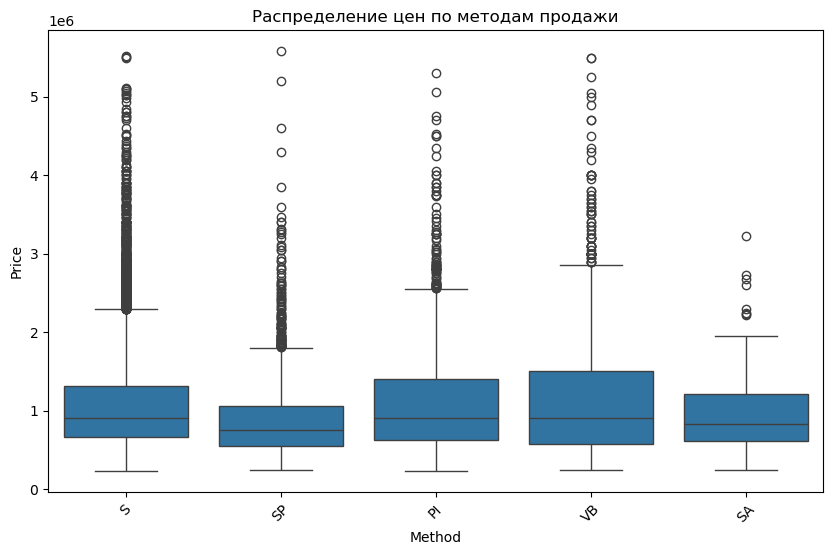

In [264]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Method', y='Price')
plt.title('Распределение цен по методам продажи')
plt.xticks(rotation=45);

In [265]:
import phik
phik_corr = train_data[["Method", "Price"]].phik_matrix()
print(phik_corr)

interval columns not set, guessing: ['Price']
         Method    Price
Method  1.00000  0.17373
Price   0.17373  1.00000


In [266]:
train_data['SellerG'].value_counts()

SellerG
Nelson           2001
Jellis           1756
hockingstuart    1579
Barry            1392
Ray              1033
                 ... 
Zahn                1
Homes               1
Allan               1
Steveway            1
Point               1
Name: count, Length: 305, dtype: int64

In [267]:
# id: уникальный идентификатор не несёт информации
# Address: мы извлекли из него полезные признаки (номер дома, улицу, тип улицы)
# Date: дата продажи не влияет на цену
# SaleYear: мы создавали этот столбец для расчета возраста дома на момент продажи 
# Postcode: у нас есть  Regionname как  локационный признак
col_drop = ['Address', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'id', 'SaleYear', 'YearBuilt']

## Обучающая и тестовая выборка (train and test)

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
df_train =  train_data.drop(columns = col_drop)

In [271]:
df_train.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount,age,House_Number,Street_Name,Street_Type
0,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,307.0,Yarra City Council,Northern Metropolitan,4019.0,68,85,Turner,St
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,1.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0,116,25,Bloomburg,St
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,1.0,2.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0,117,5,Charles,St
3,Abbotsford,3,h,850000.0,PI,Biggin,2.5,3.0,1.0,2.0,94.0,90.0,Yarra City Council,Northern Metropolitan,4019.0,69,40,Federation,La
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3.0,2.0,2.0,120.0,142.0,Yarra City Council,Northern Metropolitan,4019.0,2,55a,Park,St


In [312]:
train, test = train_test_split(df_train,train_size=0.6,random_state=25)

In [314]:
# Валидационная выборка
val, test = train_test_split(test,train_size=0.5,random_state=25)

## Список фичей

In [317]:
train.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Regionname', 'Propertycount', 'age', 'House_Number',
       'Street_Name', 'Street_Type'],
      dtype='object')

In [319]:
train.select_dtypes(include='object').columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname',
       'House_Number', 'Street_Name', 'Street_Type'],
      dtype='object')

In [321]:
X = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Regionname', 'Propertycount', 'age', 'House_Number',
       'Street_Name', 'Street_Type']

cat_features = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname',
                'House_Number', 'Street_Name', 'Street_Type']

y = 'Price'

## Запуск CatBoost

In [348]:
from catboost import CatBoostRegressor, Pool, cv

In [326]:
params = {
    "eval_metric": "RMSE",
    "loss_function": "RMSE",
    "random_seed": 25,
    "verbose": 100,
}

In [328]:
train_pool = Pool(data=train[X], label=train[y], cat_features=cat_features)

val_pool = Pool(data=val[X], label=val[y], cat_features=cat_features)

In [330]:
first_model = CatBoostRegressor(**params)
first_model.fit(train_pool, eval_set=val_pool)

Learning rate set to 0.074223
0:	learn: 586875.3899378	test: 601000.8178502	best: 601000.8178502 (0)	total: 354ms	remaining: 5m 53s
100:	learn: 285565.7292621	test: 305573.5615899	best: 305573.5615899 (100)	total: 17.9s	remaining: 2m 39s
200:	learn: 263053.2342900	test: 293279.9480530	best: 293279.9480530 (200)	total: 36.2s	remaining: 2m 23s
300:	learn: 248379.4647711	test: 288100.0829778	best: 288068.5059338 (299)	total: 54.7s	remaining: 2m 7s
400:	learn: 238439.5485890	test: 286043.9075888	best: 285946.4808813 (398)	total: 1m 13s	remaining: 1m 49s
500:	learn: 230856.6303430	test: 284067.9073856	best: 284065.2584250 (499)	total: 1m 31s	remaining: 1m 31s
600:	learn: 224589.6580886	test: 283117.9421943	best: 283004.0593767 (598)	total: 1m 50s	remaining: 1m 13s
700:	learn: 218572.0881457	test: 282510.7309233	best: 282487.3502941 (698)	total: 2m 8s	remaining: 54.9s
800:	learn: 212474.6709130	test: 282224.9399413	best: 282178.1784609 (792)	total: 2m 28s	remaining: 36.8s
900:	learn: 206806.

In [332]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [334]:
def error(y_true,y_pred):
  print(f'MAE: {mean_absolute_error(y_true,y_pred)}')
  print(f'MAPE: {mean_absolute_percentage_error(y_true,y_pred)}')
  print(f'RMSR: {np.sqrt(mean_squared_error(y_true,y_pred))}')

In [338]:
first_pred = first_model.predict(test[X])

In [342]:
error(test[y],first_pred)

MAE: 172731.69122555206
MAPE: 0.16190755129457127
RMSR: 277378.76287912467


In [344]:
first_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType

In [376]:
train_final =  pd.concat([train,val])

params = {
    "iterations": first_model.best_iteration_ + 1,
    "eval_metric": "RMSE",
    "loss_function": "RMSE",
    "learning_rate": 0.074,
    "random_seed": 25,
    "verbose": 1000,
}
train_pool = Pool(
    data=train_final[X],
    label=train_final[y],
    cat_features=cat_features
)

model = CatBoostRegressor(**params)

grid = {
    "learning_rate": [0.065, 0.075, 0.085],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [2, 3, 5],
}

grid_search_result = model.grid_search(grid, train_pool)

0:	learn: 1147184.3194509	test: 1162386.9886828	best: 1162386.9886828 (0)	total: 154ms	remaining: 2m 33s
997:	learn: 246795.5432546	test: 276469.2715199	best: 276462.0071766 (996)	total: 2m 42s	remaining: 0us

bestTest = 276462.0072
bestIteration = 996

0:	loss: 276462.0071766	best: 276462.0071766 (0)	total: 2m 42s	remaining: 1h 10m 27s
0:	learn: 1136791.9984621	test: 1151943.9585007	best: 1151943.9585007 (0)	total: 170ms	remaining: 2m 49s
997:	learn: 241937.0983077	test: 277022.1747024	best: 277006.7614339 (950)	total: 2m 42s	remaining: 0us

bestTest = 277006.7614
bestIteration = 950

1:	loss: 277006.7614339	best: 276462.0071766 (0)	total: 5m 24s	remaining: 1h 7m 39s
0:	learn: 1126416.8361140	test: 1141516.4965575	best: 1141516.4965575 (0)	total: 180ms	remaining: 2m 59s
997:	learn: 240274.0272155	test: 278810.4701467	best: 278795.3392263 (984)	total: 2m 41s	remaining: 0us

bestTest = 278795.3392
bestIteration = 984

2:	loss: 278795.3392263	best: 276462.0071766 (0)	total: 8m 6s	remaini

In [378]:
grid_search_result["params"]

{'depth': 6, 'learning_rate': 0.075, 'l2_leaf_reg': 5}

## Оценка важности признаков

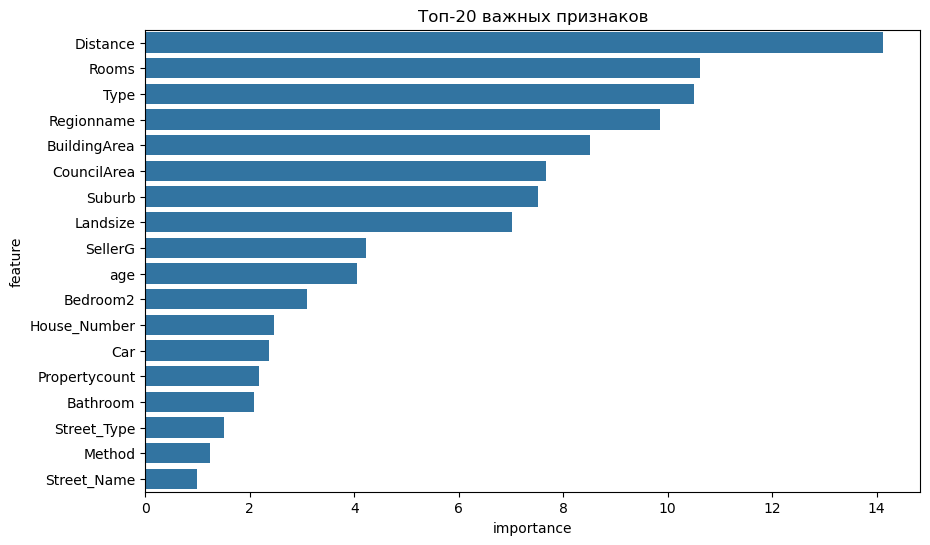

In [400]:
feature_importance = model.get_feature_importance()
fi_df = pd.DataFrame({
    'feature': X,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=fi_df.head(20))
plt.title('Топ-20 важных признаков');

## Анализ предсказаний

In [390]:
final_pred = model.predict(test[X])

In [392]:
error(test[y], final_pred)

MAE: 171681.849823348
MAPE: 0.16014013195781082
RMSR: 276058.2015416678


Text(0.5, 1.0, 'Факт vs Предсказание')

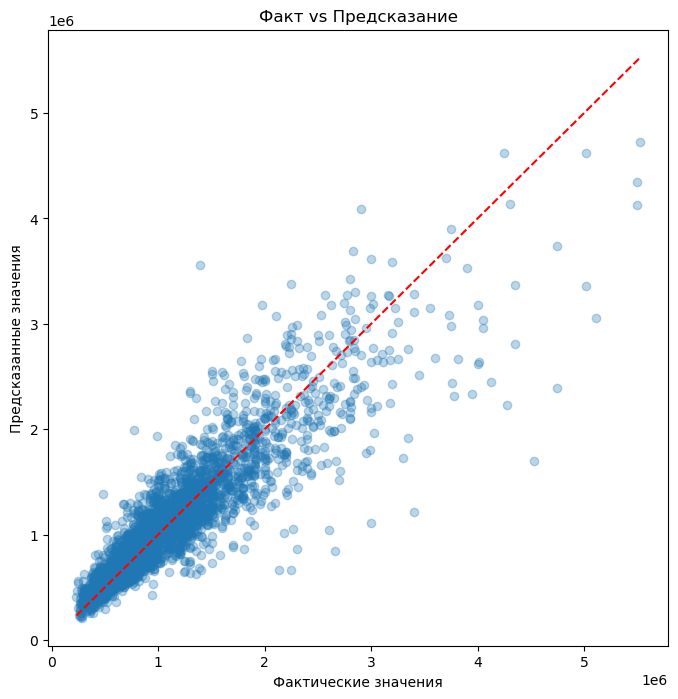

In [407]:
# График фактических vs предсказанных значений
plt.figure(figsize=(8, 8))
plt.scatter(test[y], final_pred, alpha=0.3)
plt.plot([min(test[y]), max(test[y])], [min(test[y]), max(test[y])], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Факт vs Предсказание')

Систематические ошибки:

Модель хуже предсказывает экстремально дешевые и дорогие объекты

Разброс ошибок увеличивается для более дорогих объектов

Требуется взвешенная регрессия или трансформация целевой переменной

## Распределение ошибок

Text(0.5, 1.0, 'Q-Q plot ошибок')

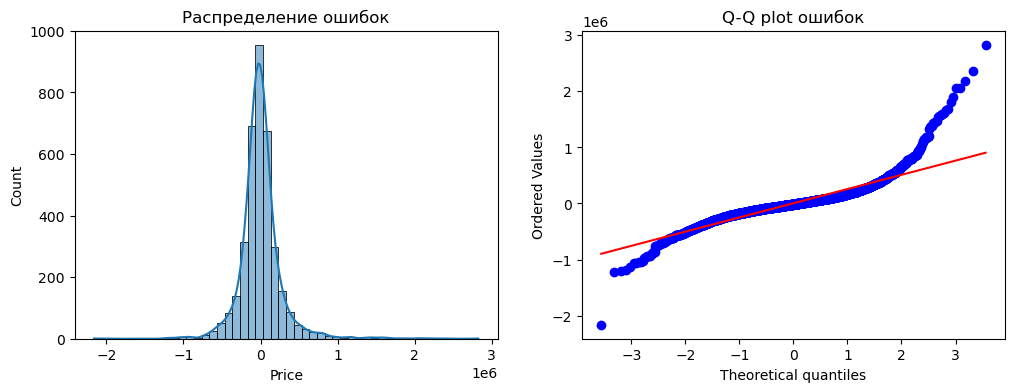

In [412]:
from scipy import stats
residuals = test[y] - final_pred

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=50, kde=True)
plt.title('Распределение ошибок')

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot ошибок')

**Хвосты распределения:**

Наличие длинных хвостов указывает на редкие, но значительные ошибки модели

Особенно заметны выбросы в области 4e6 (4 миллиона) - требует проверки данных

**Q-Q plot:**

Отклонения от прямой линии в крайних точках подтверждают ненормальность распределения ошибок

Ошибки не полностью соответствуют нормальному распределению

## SHAP-анализ (для интерпретируемости)

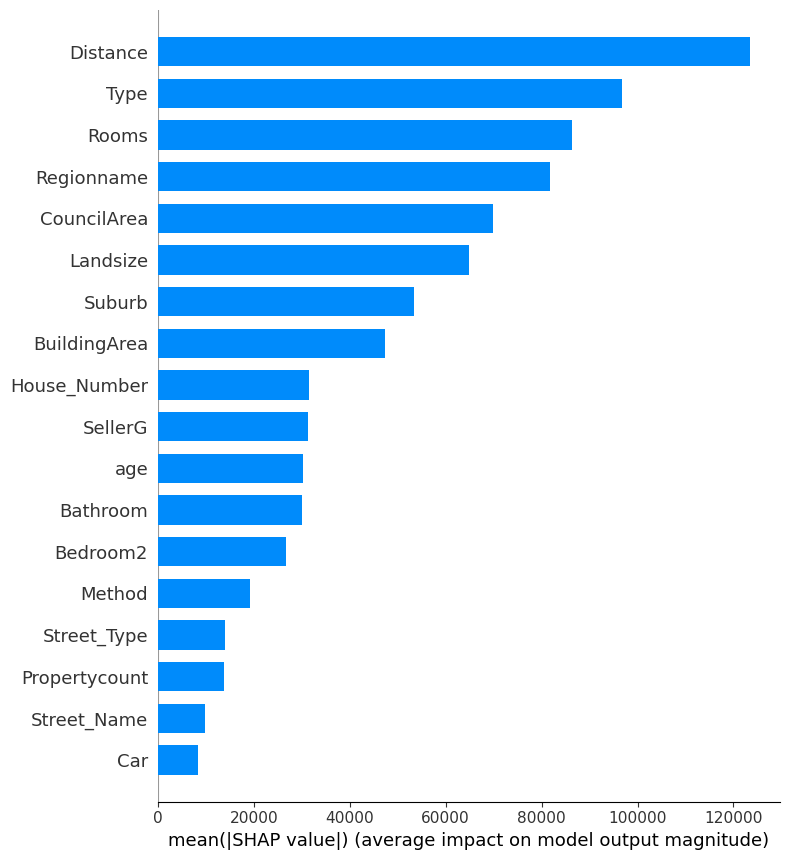

In [470]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

# Важность признаков
shap.summary_plot(shap_values, test[X], plot_type="bar")

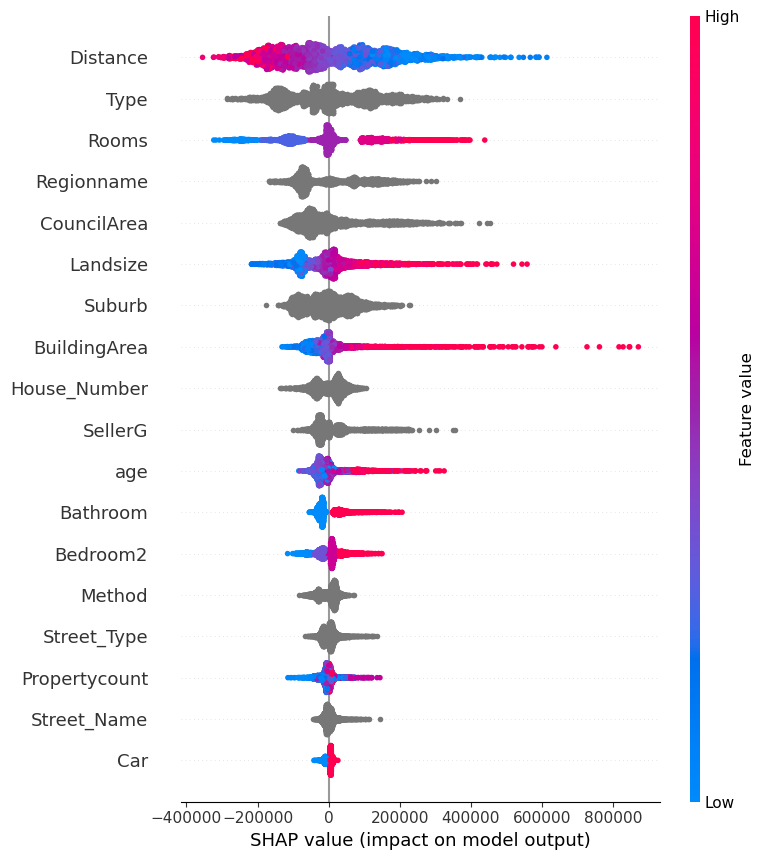

In [417]:
# Влияние признаков на предсказание
shap.summary_plot(shap_values, test[X])

**Наиболее влиятельные признаки**

*
    **Топ-5 значимых признаков:**
    
    Rooms (количество комнат) - самый важный фактор
    
    BuildingArea (площадь здания)
    
    Distance (расстояние до центра)
    
    Landsize (площадь участка)
    
    Type (тип недвижимости)

**Особенности распределения**
  
*
    **Категориальные признаки (Regionname, Method, Street_Type):**
    
    Имеют дискретные кластеры влияния
    
    Например, некоторые районы (Regionname) существенно повышают цену
    
    Числовые признаки:
    
    Чёткая зависимость: больше площадь → выше цена
    
    Нелинейность для Distance (очень близко к центру может снижать цену)

**Неожиданные закономерности**
  
*
    **House_Number (номер дома) имеет слабое влияние, но:**
    
    Чётные номера могут давать небольшой положительный эффект
    
    Age (возраст дома) показывает сложную зависимость:
    
    Новые дома ценятся выше
    
    Но очень старые (антикварные) тоже имеют повышенную цену

## Анализ переобучения

In [423]:
#Сравните метрики на train и test
train_pred = model.predict(train[X])
error(train[y],train_pred)

MAE: 147287.09882902072
MAPE: 0.14203160410112922
RMSR: 226984.70186104803


Качество модели:

MAPE = 14.2% на обучающей выборке показывает, что модель в среднем ошибается на ~14% от фактических значений

Для регрессионных задач с ценами это можно считать хорошим результатом (<20%)

## Анализ примеров с наибольшей ошибкой

In [434]:
final_pred

array([ 913860.83973938, 1244782.17116577,  619474.06453252, ...,
       1291849.80387194,  951545.45612681,  516924.62870554])

In [432]:
test['pred'] = final_pred
test['error'] = abs(test[y] - test['pred'])
test.sort_values('error', ascending=False).head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,...,BuildingArea,CouncilArea,Regionname,Propertycount,age,House_Number,Street_Name,Street_Type,pred,error
8693,East Melbourne,2,h,4525000.0,S,Caine,1.5,2.0,1.0,1.0,...,279.0,Melbourne City Council,Northern Metropolitan,3040.0,45,110,Vale,St,1.697796e+06,2.827204e+06
7478,St Kilda,4,h,4750000.0,PI,RT,6.1,4.0,2.0,2.0,...,193.0,Port Phillip City Council,Southern Metropolitan,13240.0,56,33,Marine,Pde,2.386204e+06,2.363796e+06
18140,Maribyrnong,3,h,3400000.0,SP,Jas,4.3,3.0,1.0,2.0,...,187.0,Maribyrnong City Council,Western Metropolitan,4918.0,53,88,The,Esplanade,1.215971e+06,2.184029e+06
4847,Malvern,4,h,1395000.0,S,Marshall,7.4,3.0,2.0,2.0,...,300.0,Stonnington City Council,Southern Metropolitan,4675.0,62,2/5,Moorakyne,Av,3.556787e+06,2.161787e+06
2205,Canterbury,5,h,5110000.0,S,Jellis,9.0,4.0,3.0,2.0,...,202.5,Boroondara City Council,Southern Metropolitan,3265.0,62,14,Monomeath,Av,3.057964e+06,2.052036e+06
10888,East Melbourne,4,h,4275000.0,S,Caine,1.5,4.0,2.0,2.0,...,125.0,Melbourne City Council,Northern Metropolitan,3040.0,47,127,Gipps,St,2.227173e+06,2.047827e+06
12906,Aspendale,4,h,3000000.0,VB,hockingstuart,21.5,3.0,2.0,2.0,...,130.0,Kingston City Council,South-Eastern Metropolitan,2824.0,36,2a,Park,La,1.108560e+06,1.891440e+06
4799,Malvern,2,u,2660000.0,S,Jellis,7.4,1.0,1.0,1.0,...,93.0,Stonnington City Council,Southern Metropolitan,4675.0,62,1/11,Mayfield,Av,8.447649e+05,1.815235e+06
15421,Brighton,3,h,4125000.0,S,Marshall,10.5,3.0,1.0,2.0,...,199.5,Bayside City Council,Southern Metropolitan,10579.0,55,4,Well,St,2.445442e+06,1.679558e+06
9724,Camberwell,4,h,5020000.0,S,Jellis,7.8,4.0,2.0,2.0,...,361.0,Boroondara City Council,Southern Metropolitan,8920.0,58,28,Kintore,St,3.357855e+06,1.662145e+06


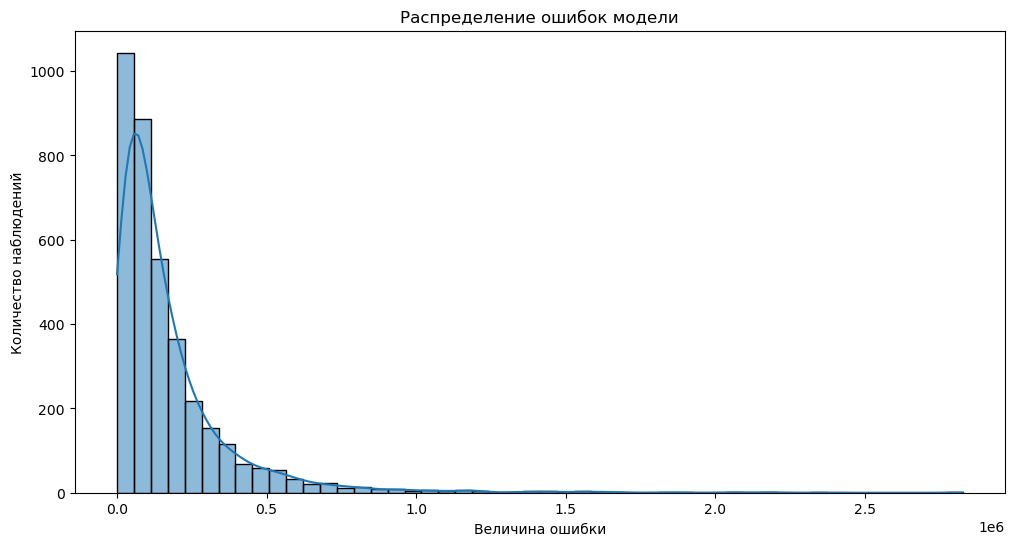

In [442]:
plt.figure(figsize=(12, 6))
sns.histplot(data=test, x='error', bins=50, kde=True)
plt.title('Распределение ошибок модели')
plt.xlabel('Величина ошибки')
plt.ylabel('Количество наблюдений');

**Графики показывают, что модель требует:**

Более сложной обработки выбросов

Сегментированного подхода к разным ценовым диапазонам

Дополнительной проверки качества данных для экстремальных значений

In [446]:
sb = model.predict(test_data.drop(col_drop,axis=1))

In [448]:
result = pd.DataFrame({
    'id': test_ids,
    'Price': sb
})

In [454]:
result.to_csv('DATA/sample_subm.csv', index=False)